In [2]:
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

plt.rcParams["figure.dpi"] = 500



Text(0.5, 0, 'Episodes')

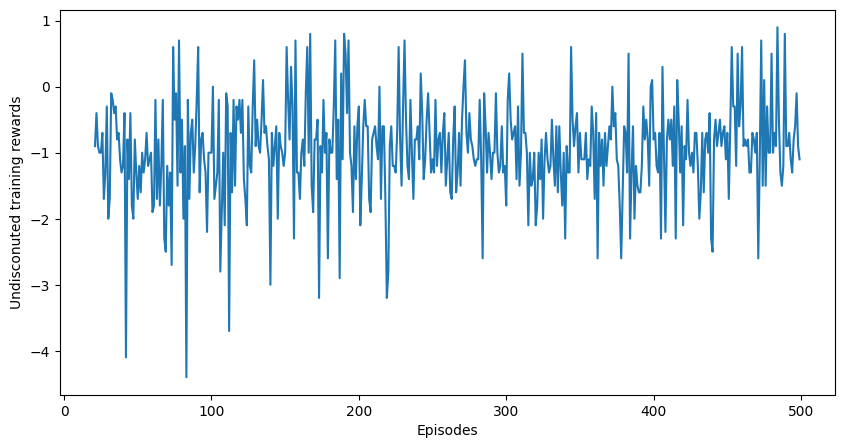

In [45]:
df = pd.read_csv("data/baseline/shielded_rewards.csv")
df = df[df["Step"] < 500]
df["X"] = df["Step"]
df["Y"] = df["Value"]
df = df[["X", "Y"]]
ax = df.plot.line(x='X', y='Y',legend=False, figsize=(10,5))
ax.set_ylabel("Undisconuted training rewards")
ax.set_xlabel("Episodes")


Text(0.5, 0, 'Steps')

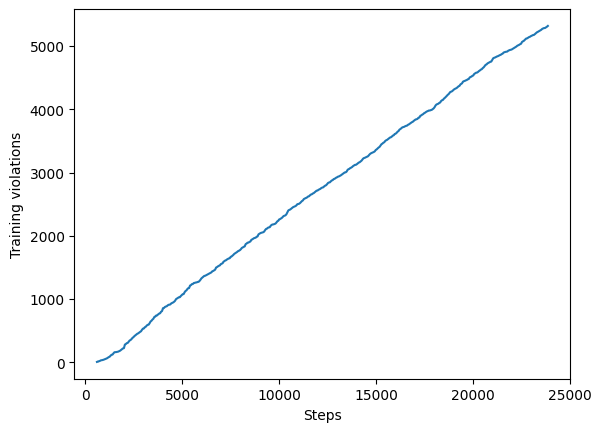

In [13]:
df = pd.read_csv("data/baseline/shielded_violation_count.csv")
df = df.set_index("Step")
df["Violations"] = df["Value"].cumsum()
df = df[["Violations"]]
ax = df.plot.line(legend=False)
ax.set_ylabel("Training violations")
ax.set_xlabel("Steps")

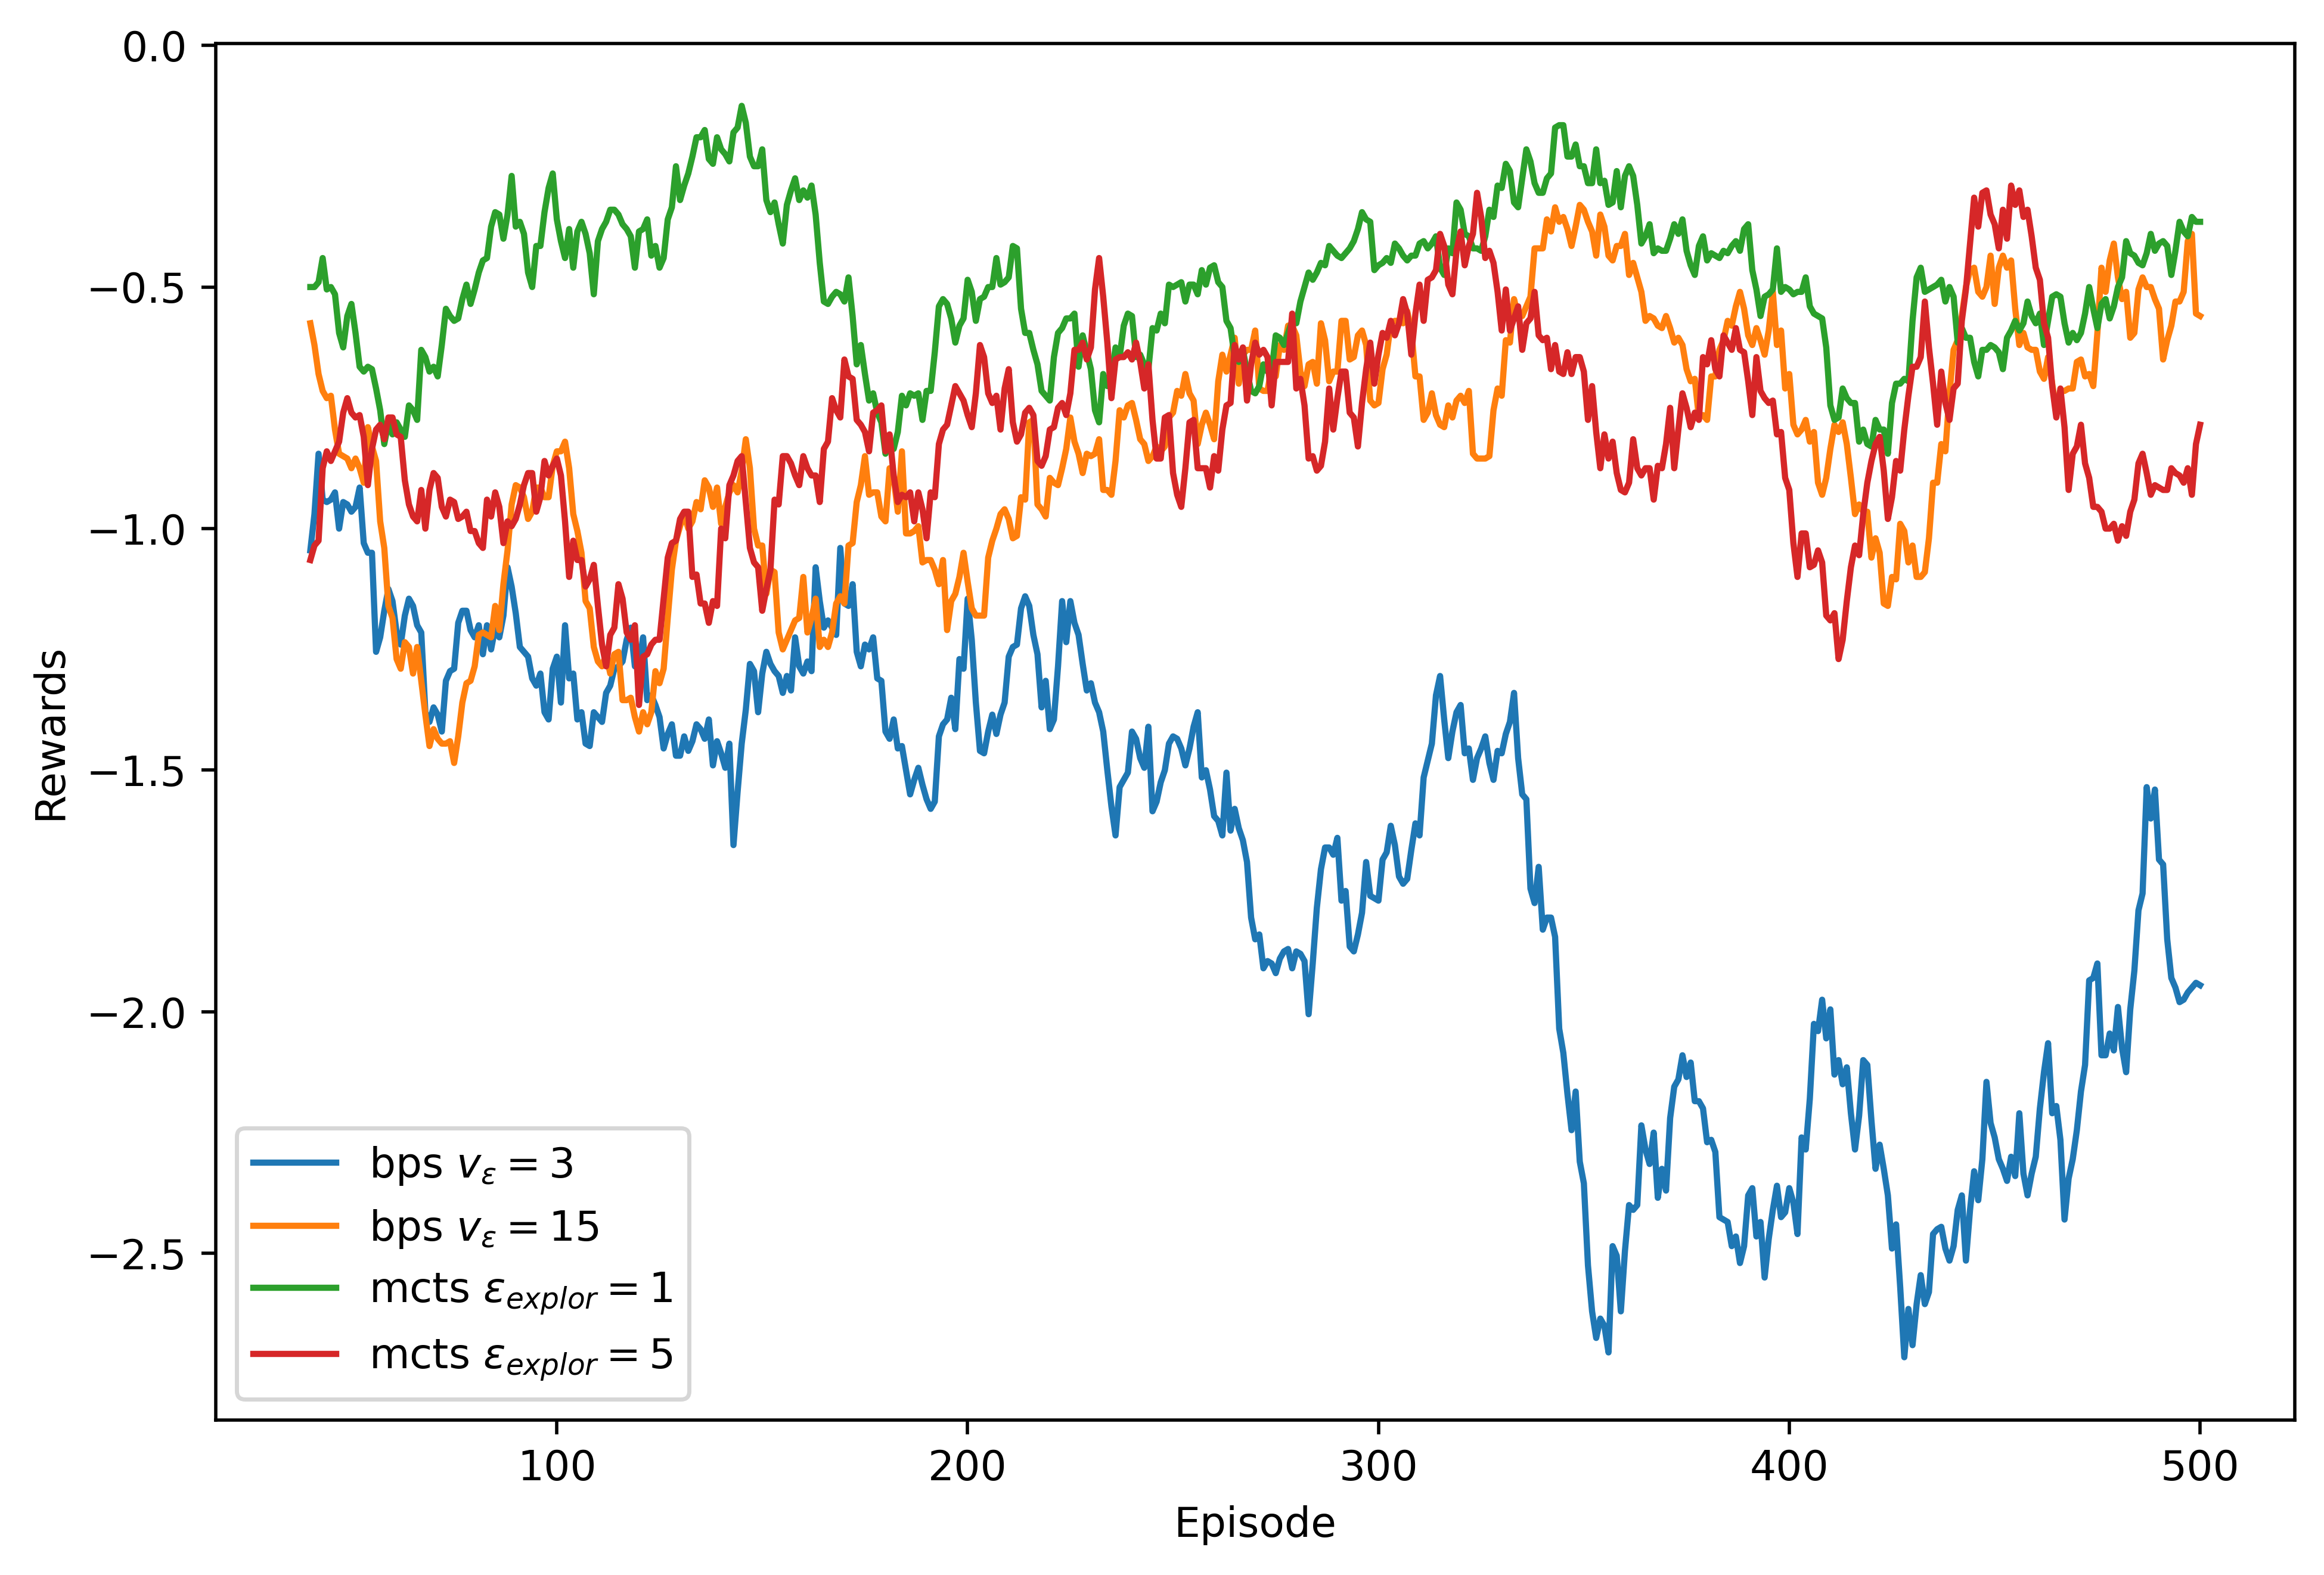

In [63]:
from functools import reduce
base = pd.read_csv("data/baseline/unshielded_rewards.csv")
bps_3 = pd.read_csv("data/bps/lavagap_bps_3.csv")
bps_15 = pd.read_csv("data/bps/lavagap_bps_15.csv")
mcts_6 = pd.read_csv("data/mcts/v6.csv")
mcts_7 = pd.read_csv("data/mcts/v7.csv")

names = [r"bps $v_\epsilon=3$", r"bps $v_\epsilon=15$", r"mcts $\epsilon_{explor}=1$", r"mcts $\epsilon_{explor}=5$"]
dfs = [bps_3, bps_15, mcts_6, mcts_7]

for df, n in zip(dfs, names):
  df.set_index('Step', inplace=True)
  df[n] = df['Value'].rolling(window=20).mean()
  df.drop(columns=['Wall time', 'Value'], inplace=True)

df = reduce(lambda df1,df2: pd.merge(df1,df2,on='Step'), dfs)
ax = df.plot.line(figsize=(9, 6))
ax.set_xlabel('Episode')
ax.set_ylabel('Rewards')
ax.legend(loc='lower left')


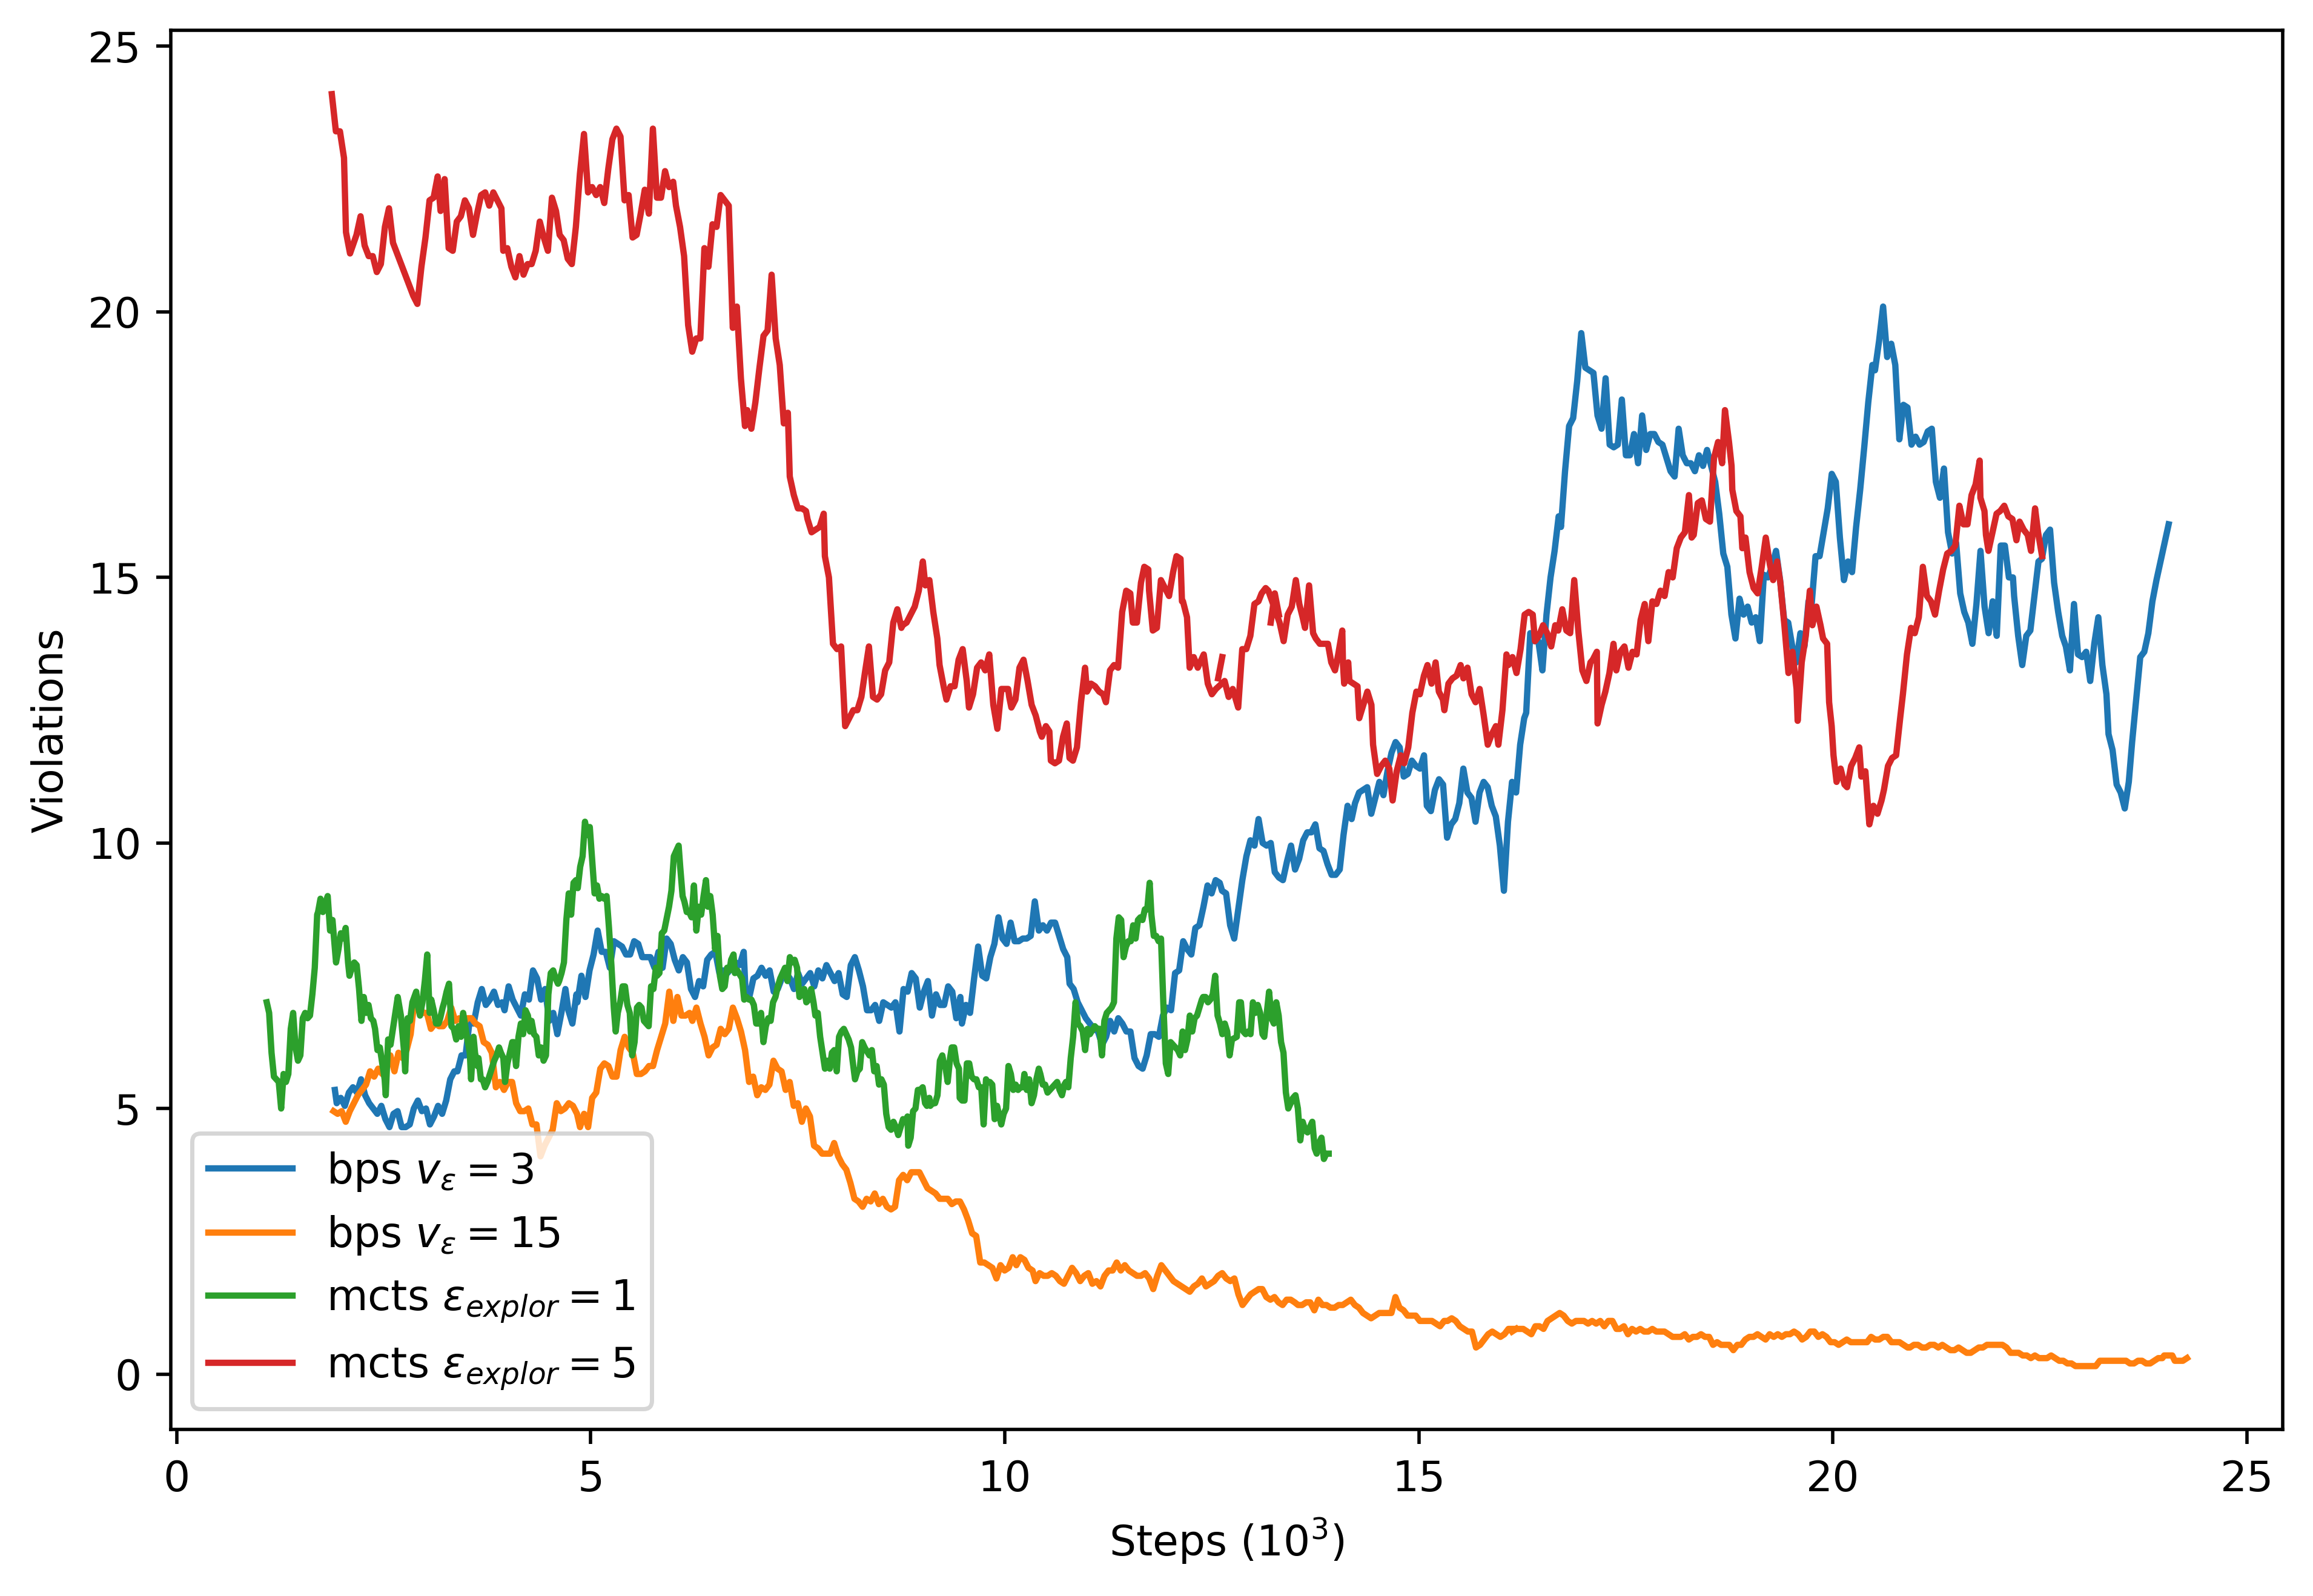

In [27]:
from functools import reduce
bps_3 = pd.read_csv("data/bps/lavagap_3_violation.csv")
bps_15 = pd.read_csv("data/bps/lavagap_15_violation.csv")
mcts_6 = pd.read_csv("data/mcts/v6_violation.csv")
mcts_7 = pd.read_csv("data/mcts/v7_violation.csv")

names = [r"bps $v_\epsilon=3$", r"bps $v_\epsilon=15$", r"mcts $\epsilon_{explor}=1$", r"mcts $\epsilon_{explor}=5$"]
dfs = [bps_3, bps_15, mcts_6, mcts_7]

for df, n in zip(dfs, names):
  df.set_index('Step', inplace=True)
  # df[n] = df['Value']
  df[n] = df['Value'].rolling(window=20).mean()
  df.drop(columns=['Wall time', 'Value'], inplace=True)


df = reduce(lambda df1,df2: pd.merge(df1,df2,on='Step',how='outer'), dfs)
df['Step'] = df.index / 1000
ax = df.plot.line(x='Step', figsize=(9, 6))
ax.set_xlabel(r"Steps $(10^3)$")
ax.set_ylabel('Violations')
ax.legend(loc='lower left')
